
# Machine Learning Practical Record

**Name:** Gautam Tiwari  
**Course:** B.Tech CSE (IBM)  
**Subject:** Machine Learning

This notebook contains the implementation of different Machine Learning algorithms
as part of university practical work. Each experiment includes dataset viewing,
model building, result analysis and graphical output wherever required.



## Import Required Libraries


In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score




# Practical 1: Linear Regression

### Aim:
To study and implement Linear Regression and find the relationship between
independent and dependent variables using best fit line.

### Description:
Linear Regression is a supervised learning algorithm used to predict continuous
values. It finds a straight line that best fits the data points.



In [19]:

from sklearn.linear_model import LinearRegression

np.random.seed(1)

X = 2 * np.random.rand(100,1)
y = 5 + 4*X + np.random.randn(100,1)

print("Sample input values (X):")
print(X[:10])

print("\nSample output values (y):")
print(y[:10])



Sample input values (X):
[[8.34044009e-01]
 [1.44064899e+00]
 [2.28749635e-04]
 [6.04665145e-01]
 [2.93511782e-01]
 [1.84677190e-01]
 [3.72520423e-01]
 [6.91121454e-01]
 [7.93534948e-01]
 [1.07763347e+00]]

Sample output values (y):
[[8.65181098]
 [8.74039473]
 [4.69471099]
 [8.24663522]
 [6.40414186]
 [6.50071994]
 [6.26775355]
 [7.56372775]
 [8.36070118]
 [9.72058552]]


In [20]:

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))



Intercept: [5.23695725]
Slope: [[3.84246254]]
Mean Squared Error: 0.7997618656011583
R2 Score: 0.8648699294406113


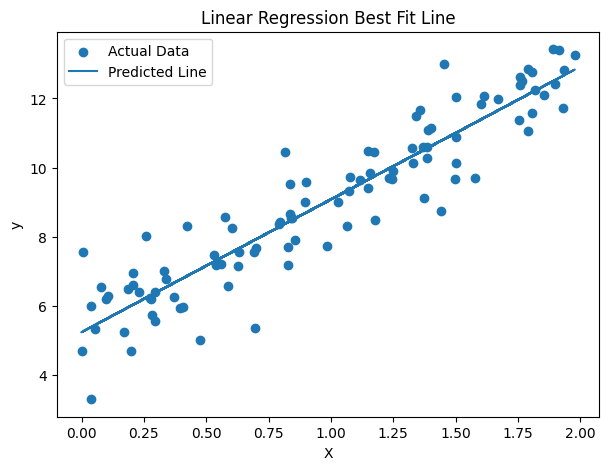

In [21]:

plt.figure(figsize=(7,5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, label="Predicted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Best Fit Line")
plt.legend()
plt.show()




# Practical 2: Best Fit Line and Residual Plot

### Aim:
To observe errors between actual and predicted values using residual plot.



In [22]:

residuals = y - y_pred

print("Sample residual values:")
print(residuals[:10])



Sample residual values:
[[ 0.21007086]
 [-2.03220229]
 [-0.54312523]
 [ 0.6862748 ]
 [ 0.03937658]
 [ 0.5541475 ]
 [-0.40059948]
 [-0.32883781]
 [ 0.07461561]
 [ 0.34286203]]


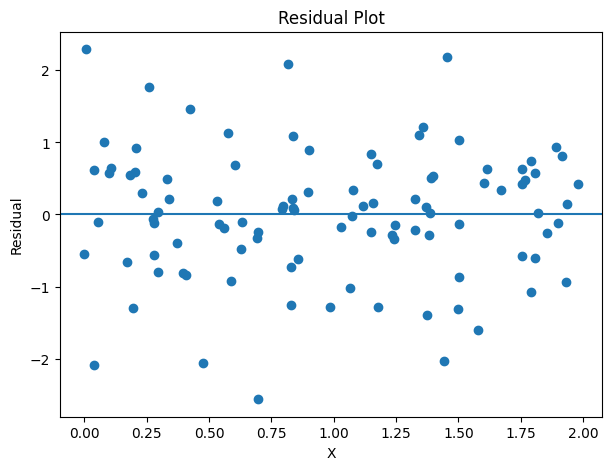

In [23]:

plt.figure(figsize=(7,5))
plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("X")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()




# Practical 3: Logistic Regression

### Aim:
To classify data using Logistic Regression algorithm.

### Dataset Used:
Breast Cancer Dataset from sklearn.



In [24]:

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df["Target"] = y

print("Dataset preview:")
df.head()



Dataset preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9590643274853801

Confusion Matrix:
 [[ 62   1]
 [  6 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171




# Practical 4: Multiple Linear Regression

### Aim:
To predict output using more than one independent variable.



In [26]:

from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=120,
    n_features=3,
    noise=12,
    random_state=10
)

df = pd.DataFrame(X, columns=["Feature1", "Feature2", "Feature3"])
df["Target"] = y

print(df.head())



   Feature1  Feature2  Feature3     Target
0 -1.533069  0.148961  0.687905 -59.922582
1 -0.081122 -0.529296 -0.697810 -83.061499
2  0.715279 -1.545400  1.331587  76.565375
3  0.273049 -1.618571  0.141104 -70.282103
4  0.660232 -0.350872 -0.731970 -30.909656


In [27]:

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 Score:", r2_score(y, y_pred))



Coefficients: [94.37098196 62.0966282  79.33530116]
Intercept: -0.27702117522865066
R2 Score: 0.9911898433511966



# Practical 5: K-Nearest Neighbors (KNN)

### Aim:
To classify data using KNN algorithm and observe effect of K value.



In [28]:

from sklearn.neighbors import KNeighborsClassifier

y_class = (y > y.mean()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42
)

accuracy_list = []

for k in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)

print("Accuracy for different K values:")
for i, acc in enumerate(accuracy_list, start=1):
    print(f"K = {i} -> Accuracy = {acc}")



Accuracy for different K values:
K = 1 -> Accuracy = 0.9444444444444444
K = 2 -> Accuracy = 0.8888888888888888
K = 3 -> Accuracy = 0.8888888888888888
K = 4 -> Accuracy = 0.8888888888888888
K = 5 -> Accuracy = 0.8888888888888888
K = 6 -> Accuracy = 0.9166666666666666
K = 7 -> Accuracy = 0.9166666666666666
K = 8 -> Accuracy = 0.8888888888888888
K = 9 -> Accuracy = 0.8333333333333334
K = 10 -> Accuracy = 0.8611111111111112
K = 11 -> Accuracy = 0.8333333333333334
K = 12 -> Accuracy = 0.8611111111111112
K = 13 -> Accuracy = 0.8611111111111112
K = 14 -> Accuracy = 0.8611111111111112
K = 15 -> Accuracy = 0.8333333333333334


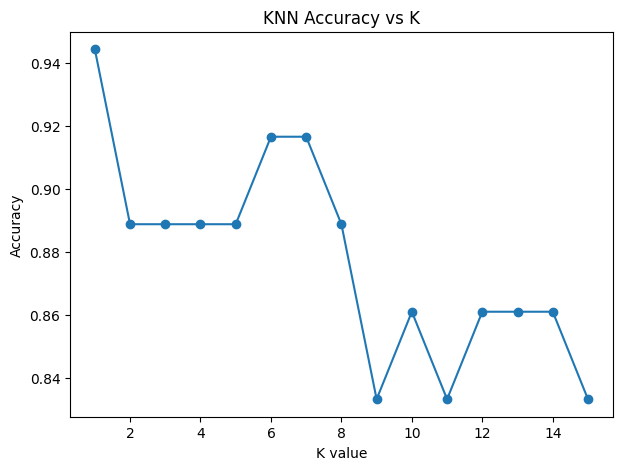

In [29]:

plt.figure(figsize=(7,5))
plt.plot(range(1,16), accuracy_list, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()




# Practical 6: Decision Tree Classifier

### Aim:
To build a Decision Tree model for classification.



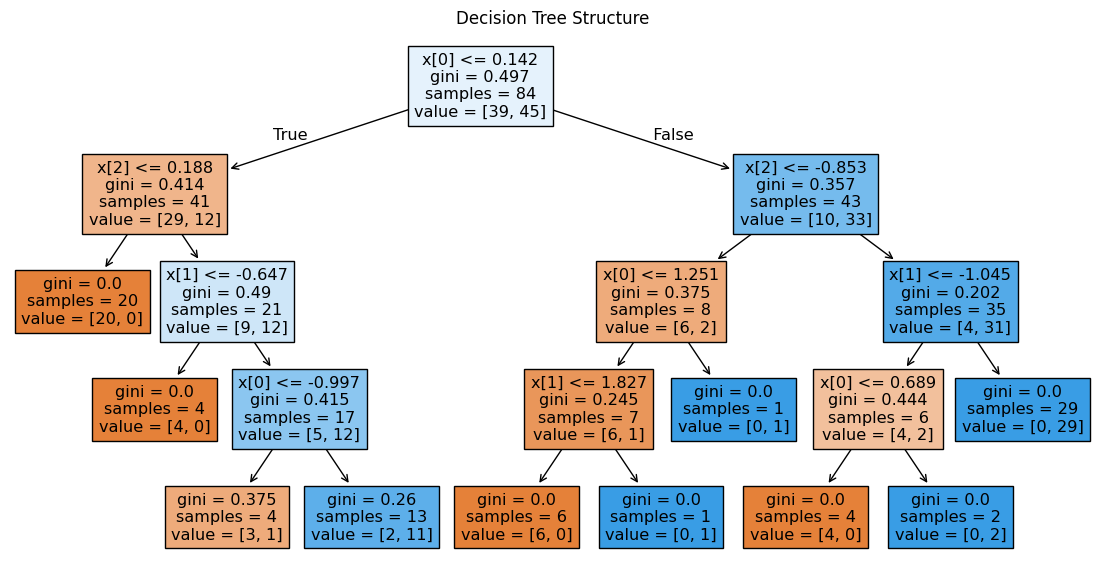

In [30]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

plt.figure(figsize=(14,7))
plot_tree(model, filled=True)
plt.title("Decision Tree Structure")
plt.show()




# Practical 7: Naive Bayes Classifier



In [31]:

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))



Accuracy: 0.8888888888888888
Confusion Matrix:
 [[16  3]
 [ 1 16]]



# Practical 8: Support Vector Machine (SVM)



In [32]:

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))



Accuracy: 0.9722222222222222



# Practical 9: Principal Component Analysis (PCA)

### Aim:
To reduce the dimensionality of dataset using PCA.



In [33]:

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_wine()

X = StandardScaler().fit_transform(data.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original Features:", data.data.shape[1])
print("Reduced Features:", X_pca.shape[1])



Original Features: 13
Reduced Features: 2


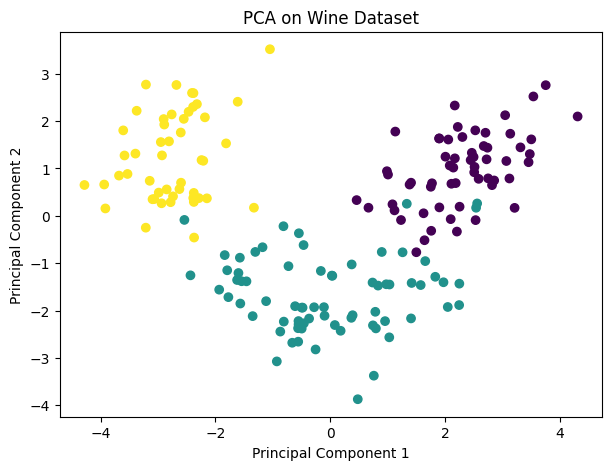

In [34]:

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data.target)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset")
plt.show()




# Conclusion

All major Machine Learning algorithms were implemented successfully using Python.
The results show how different algorithms perform on different types of data.
Graphical outputs helped in understanding data distribution and model behavior.
This practical work improved understanding of both theory and implementation.

